In [ ]:
# Design_Uni_Random_b

In [ ]:
import os

cuda_device = '2'

os.environ["CUDA_VISIBLE_DEVICES"] = cuda_device
os.environ['CUBLAS_WORKSPACE_CONFIG']=':4096:8'

import torch

import numpy as np

from para_init import parameters, setup_seed
from permutation import permutation_train



In [ ]:
import torch.multiprocessing as mp
num_processes = 10

width_vector = [10, 20, 40, 80, 160, 320, 640, 1280]
batch_size = 8

# generate a 2-dimensional matrix to hold the results in (i,j)
result_matrix = np.zeros((len(width_vector), 10, 2))

i = 0

for width in width_vector:
    
    setup_seed(2022)
    
    shared_params = parameters()
    
    shared_params.width = width
    shared_params.batch_size = batch_size
    shared_params.adjust_scale = 0

            
    if __name__ == "__main__":
        
        mp.set_start_method('spawn', force=True)
        
        manager = mp.Manager()
        results_queue = manager.Queue()

        mp.spawn(permutation_train, args=(shared_params, results_queue), nprocs=num_processes, join=True)
        
        while not results_queue.empty():
            (idx, (error, error_infty)) = results_queue.get()
            result_matrix[i, idx, :] = [error, error_infty]

    i += 1

    

Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!


In [ ]:
print(result_matrix)

[[[2.16391146e-01 1.08005416e+00]
  [1.86989829e-02 2.52145559e-01]
  [1.91750064e-01 7.71625221e-01]
  [1.43178701e-01 7.51545191e-01]
  [1.56232387e-01 6.64489329e-01]
  [3.79601151e-01 1.06131577e+00]
  [5.99615335e-01 1.23886371e+00]
  [1.55699223e-01 7.92856216e-01]
  [6.69637173e-02 7.12800860e-01]
  [1.16883449e-01 6.64188504e-01]]

 [[3.95775586e-02 4.32440788e-01]
  [7.46723786e-02 8.50397170e-01]
  [2.43852083e-02 3.83923501e-01]
  [1.17727928e-01 7.43556976e-01]
  [6.22650422e-02 6.74338222e-01]
  [1.42873209e-02 3.85218799e-01]
  [5.06019145e-02 5.53650439e-01]
  [2.51077145e-01 8.57847989e-01]
  [1.40572548e-01 8.69554162e-01]
  [5.61221689e-02 4.24800813e-01]]

 [[6.75658789e-03 2.25455701e-01]
  [1.02053508e-02 2.76070416e-01]
  [1.12743517e-02 2.35598981e-01]
  [4.70088748e-03 1.88535184e-01]
  [4.53906246e-02 4.76794273e-01]
  [5.82608068e-03 1.25809610e-01]
  [8.27218965e-03 1.94207489e-01]
  [2.12342851e-02 3.60841811e-01]
  [3.01473569e-02 4.18959022e-01]
  [1.03652

(8, 10, 2)
0.9697738672251275
<class 'numpy.ndarray'>
0.0
[2.10145468e-01 9.01580311e-02 1.31590669e-02 4.38030196e-03
 2.64000560e-03 1.53549016e-03 5.97375783e-04 1.71568329e-04]
[0.96977387 0.71814339 0.26045044 0.16128066 0.11908313 0.09211295
 0.06002759 0.03233896]
y_min: [2.00736262e-02 2.90959701e-02 2.22430751e-03 1.43682631e-03
 9.12645424e-04 4.18266020e-04 1.42845034e-04 2.98622690e-05]
y_max: [0.42139602 0.37866721 0.08853064 0.02065964 0.01111678 0.00759099
 0.00143276 0.00106462]
[[1.90071842e-01 6.10620610e-02 1.09347594e-02 2.94347566e-03
  1.72736017e-03 1.11722414e-03 4.54530749e-04 1.41706060e-04]
 [2.11250549e-01 2.88509174e-01 7.53715704e-02 1.62793403e-02
  8.47677288e-03 6.05549802e-03 8.35382274e-04 8.93047577e-04]]


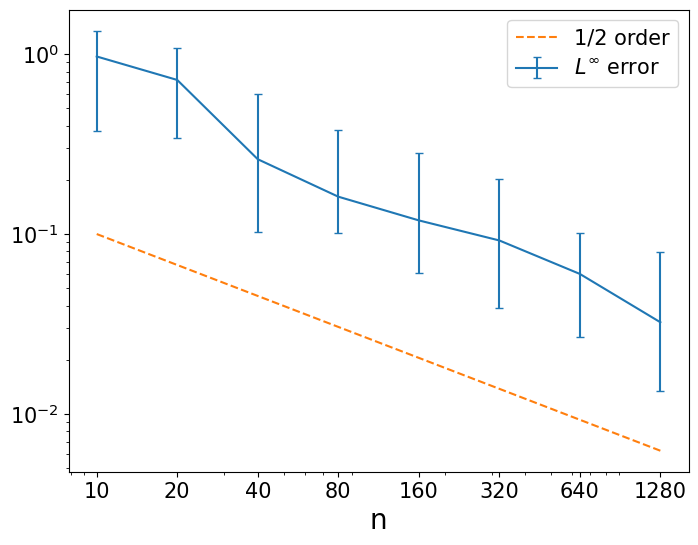

In [ ]:
from statistics import geometric_mean
import matplotlib.pyplot as plt

x = width_vector

print(np.shape(result_matrix))

print(geometric_mean(result_matrix[0,:,1]))

mean = np.zeros(int(len(x)))
mean_inf = np.zeros(int(len(x)))

print(type(mean))

print(mean[0])

for i in range(len(x)):
    mean[i] = geometric_mean(result_matrix[i,:,0])
    mean_inf[i] = geometric_mean(result_matrix[i,:,1])

print(mean)
print(mean_inf)

y_max = np.max(result_matrix[:,:,0], axis = 1)
y_min = np.min(result_matrix[:,:,0], axis = 1)

y_min_inf = np.min(result_matrix[:,:,1], axis = 1)
y_max_inf = np.max(result_matrix[:,:,1], axis = 1)

yerr = np.abs(np.vstack((y_min, y_max)) - mean)

print('y_min: '+str(y_min))
print('y_max: '+str(y_max))
print(yerr)

yerr2 = np.abs(np.vstack((y_min_inf, y_max_inf)) - mean_inf)

x_ref = [x[0], x[-1]]

y_ref = [1E-1, 1E-1/np.sqrt(np.power(2,len(x)))]

ax = plt.figure(figsize=(8, 6))
plt.errorbar(x, mean_inf, yerr=yerr2, capsize = 3, label='$L^\infty$ error')
plt.plot(x_ref, y_ref, linestyle='--', label='1/2 order')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n', size=20)
plt.legend(fontsize=15)
plt.xticks(x, x, fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot.pdf', bbox_inches='tight')
plt.show()